In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from itertools import product
import matplotlib.pyplot as plt

# load dataset 6

In [2]:
df = pd.read_csv('6_combined_loan_to_value_ratio.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156593 entries, 0 to 156592
Data columns (total 36 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   census_tract                              156499 non-null  float64
 1   action_taken                              156593 non-null  int64  
 2   loan_type                                 156593 non-null  int64  
 3   lien_status                               156593 non-null  int64  
 4   reverse_mortgage                          156593 non-null  int64  
 5   open_end_line_of_credit                   156593 non-null  int64  
 6   loan_amount                               156593 non-null  int64  
 7   combined_loan_to_value_ratio              156593 non-null  object 
 8   interest_rate                             156593 non-null  object 
 9   total_loan_costs                          79455 non-null   float64
 10  origination_charges 

In [4]:
print(df['total_loan_costs'].value_counts())

total_loan_costs
0.00        2251
695.00      1056
635.43       710
15.43        439
505.43       436
            ... 
3022.18        1
2258.00        1
7066.84        1
2968.03        1
14191.23       1
Name: count, Length: 53458, dtype: int64


In [5]:
unique_categories = df['total_loan_costs'].nunique()
print("Number of Unique Categories:", unique_categories)

Number of Unique Categories: 53458


In [6]:
# First, convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df['total_loan_costs'].min()
maximum_interest_rate = df['total_loan_costs'].max()
median_interest_rate = df['total_loan_costs'].median()

print("Minimum total_loan_costs:", minimum_interest_rate)
print("Maximum total_loan_costs:", maximum_interest_rate)
print("Median total_loan_costs:", median_interest_rate)

Minimum total_loan_costs: 0.0
Maximum total_loan_costs: 389990.0
Median total_loan_costs: 3310.03


In [7]:
# Convert the 'total_loan_costs' column to numeric (float)
df['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')  # 'coerce' handles non-numeric values by converting them to NaN

# Calculate the quantiles
Q1 = df['total_loan_costs'].quantile(0.25)
Q3 = df['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_loan_costs'] < lower_bound) | (df['total_loan_costs'] > upper_bound)]

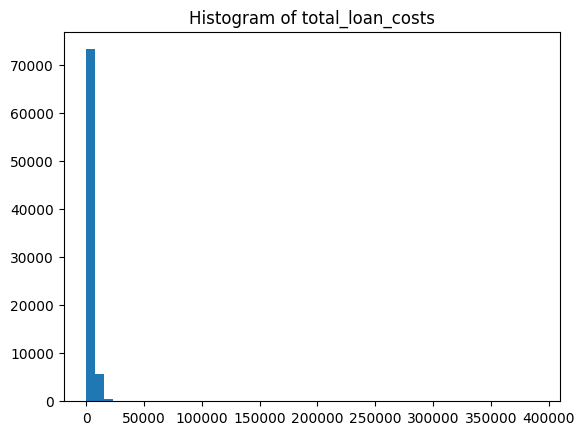

In [8]:
plt.hist(df['total_loan_costs'], bins=50)  # Adjust the number of bins as needed
plt.title('Histogram of total_loan_costs')
plt.show()

[     nan  2505.18  1894.93 ...  2101.33  3084.55 14191.23]
77138


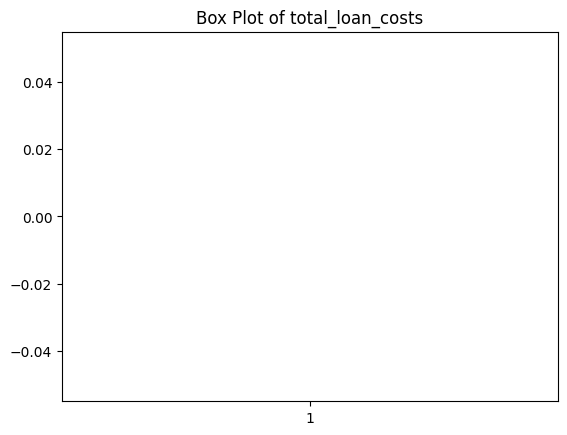

In [9]:
df1 = df.copy()
df1['total_loan_costs'] = pd.to_numeric(df['total_loan_costs'], errors='coerce')

print(df['total_loan_costs'].unique())
print(df['total_loan_costs'].isna().sum())

# Create a box plot of the 'combined_loan_to_value_ratio' column
plt.boxplot(df1['total_loan_costs'])
plt.title('Box Plot of total_loan_costs')
plt.show()

## The outlier squashes the data.
We can draw a boxplot without the outlier.

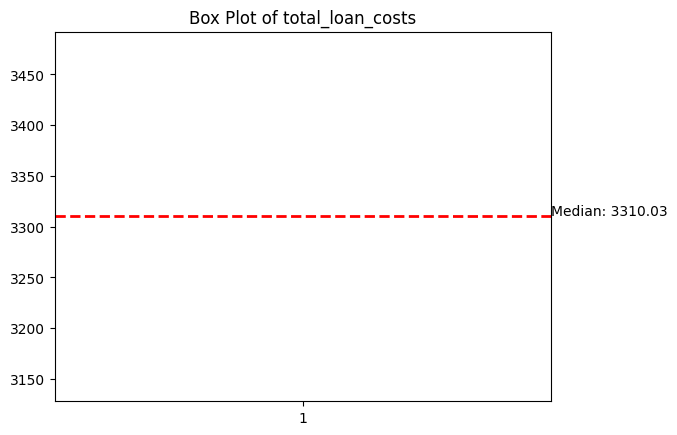

In [10]:
import matplotlib.pyplot as plt

# Create a box plot of the 'total_loan_costs' column
plt.boxplot(df1['total_loan_costs'], showfliers=False)  # Exclude outliers
plt.title('Box Plot of total_loan_costs')

# Calculate the median value
median_value = df1['total_loan_costs'].median()

# Add a median line
plt.axhline(median_value, color='r', linestyle='dashed', linewidth=2)

# Add text with the median value 5 pixels above the line
plt.text(1.5, median_value + 5, f'Median: {median_value}', va='center')

plt.show()


# Conclusion

this meadian seems more normal!
we have to remove outliers.

# Remove outliers

In [11]:
# Calculate the IQR for total_loan_costs
Q1 = df1['total_loan_costs'].quantile(0.25)
Q3 = df1['total_loan_costs'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean mask for outliers
outliers_mask = (df1['total_loan_costs'] < lower_bound) | (df1['total_loan_costs'] > upper_bound)

# Create a new DataFrame without outliers
df_no_outliers = df1[~outliers_mask]

# Display the number of removed outliers
print(f'Number of removed outliers: {outliers_mask.sum()}')

Number of removed outliers: 4411


In [12]:
# Create a DataFrame of removed outliers
outliers_df = df1[outliers_mask]

In [13]:
# Display the values of the removed outliers
print(outliers_df['total_loan_costs'])

77163     18401.88
77182     10706.43
77185      9924.71
77192     16126.87
77193     11426.43
            ...   
156546    10844.07
156551    10098.50
156561    19964.42
156569    17199.45
156591    14191.23
Name: total_loan_costs, Length: 4411, dtype: float64


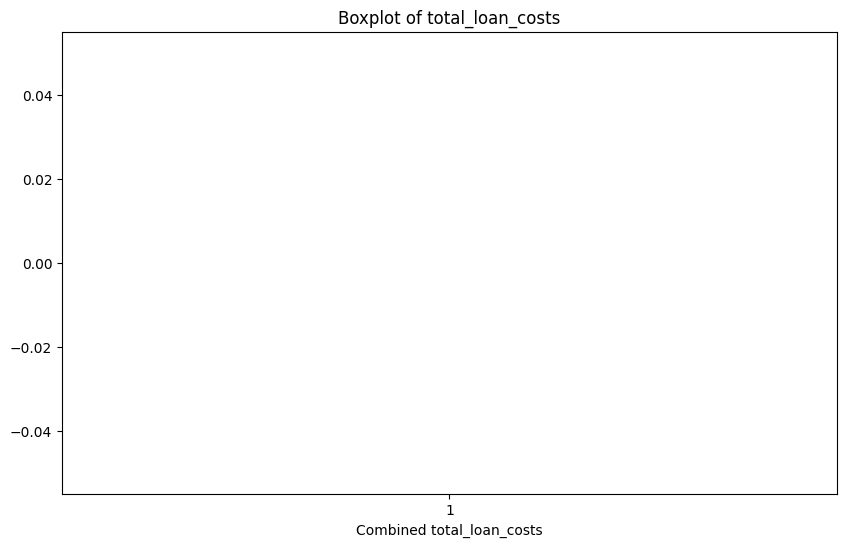

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_no_outliers['total_loan_costs'])
plt.title('Boxplot of total_loan_costs')
plt.xlabel('Combined total_loan_costs')
plt.show()

In [15]:
# First, convert the 'combined_loan_to_value_ratio' column to numeric (float)
df_no_outliers.loc[:, 'total_loan_costs'] = pd.to_numeric(df_no_outliers['total_loan_costs'], errors='coerce')

# Now, calculate the minimum, maximum, and median
minimum_interest_rate = df_no_outliers['total_loan_costs'].min()
maximum_interest_rate = df_no_outliers['total_loan_costs'].max()
median_interest_rate = df_no_outliers['total_loan_costs'].median()

print("Minimum Interest Rate:", minimum_interest_rate)
print("Maximum Interest Rate:", maximum_interest_rate)
print("Median Interest Rate:", median_interest_rate)

Minimum Interest Rate: 0.0
Maximum Interest Rate: 8871.15
Median Interest Rate: 3194.04


In [16]:
print(df_no_outliers['total_loan_costs'].value_counts())

total_loan_costs
0.00       2251
695.00     1056
635.43      710
15.43       439
505.43      436
           ... 
5733.93       1
4532.03       1
2856.90       1
3229.15       1
3084.55       1
Name: count, Length: 49073, dtype: int64


In [17]:
# Remove categories below 100 entries.

#threshold = 100
#counts = df_no_outliers['total_loan_costs'].value_counts()
#values_to_remove = counts[counts < threshold].index
#df_filtered = df_no_outliers[~df_no_outliers['total_loan_costs'].isin(values_to_remove)]


# Make range categories

In [18]:
new_df = df_no_outliers.copy()

# Define a function to categorize 'total_loan_costs' into the desired ranges
def categorize_total_loan_costs(cost):
    # Define a list of upper bounds for the ranges
    upper_bounds = [500 * i for i in range(1, 41)]  # Generates ranges up to 8000 in increments of 200
    labels = [f'{lower}-{upper}' for lower, upper in zip([0] + upper_bounds, upper_bounds)]
    
    # Find the appropriate range for 'total_loan_costs' and return the label
    for label, upper_bound in zip(labels, upper_bounds):
        if cost <= upper_bound:
            return label
    return 'Other'

# Apply the categorization function to 'total_loan_costs' column
new_df['total_loan_costs'] = new_df['total_loan_costs'].apply(categorize_total_loan_costs)

# Print the result
print(new_df['total_loan_costs'].value_counts())

total_loan_costs
Other        77138
2500-3000     9451
3000-3500     9368
3500-4000     7555
500-1000      7411
2000-2500     6243
4000-4500     5597
0-500         4583
4500-5000     4486
5000-5500     3485
1500-2000     3455
5500-6000     2761
1000-1500     2681
6000-6500     2142
6500-7000     1827
7000-7500     1393
7500-8000     1183
8000-8500      846
8500-9000      577
Name: count, dtype: int64


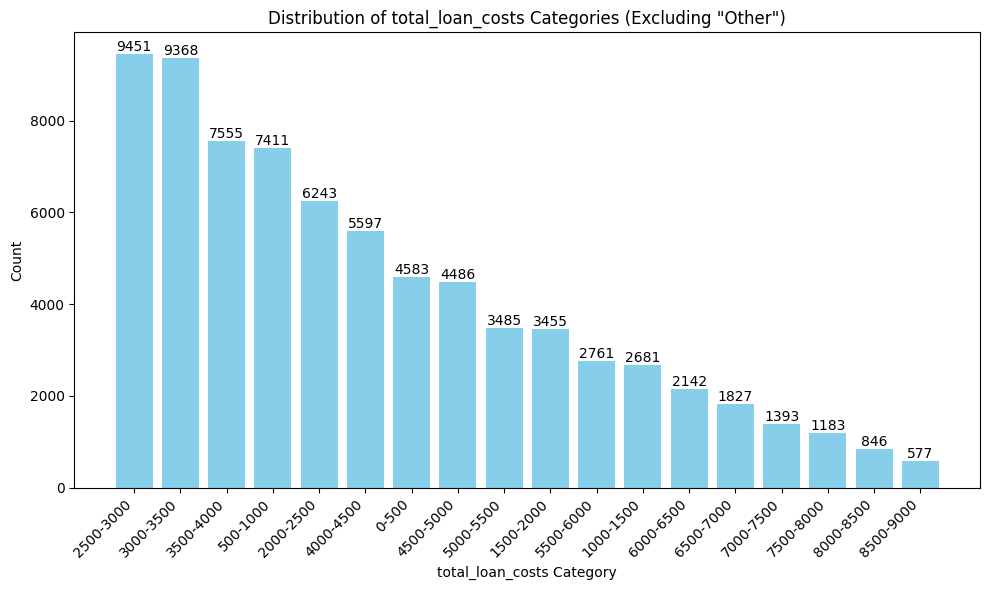

In [19]:
# Filter the DataFrame to exclude the 'Other' category
filtered_df = new_df[new_df['total_loan_costs'] != 'Other']

# Get the value counts for the filtered DataFrame
value_counts = filtered_df['total_loan_costs'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('total_loan_costs Category')
plt.ylabel('Count')
plt.title('Distribution of total_loan_costs Categories (Excluding "Other")')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Display the counts on top of the bars
for i, count in enumerate(value_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [20]:
new_df.to_csv('7_total_loan_costs.csv', index=False)